In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# The sigmoid activation function computes the sigmoids element-wise
def sigmoid(x):
    y = 1./(1+np.exp(-x));
    return y

np.random.seed(123456)

data = datasets.load_digits()

X = data['data']
y = data['target']

# get the one hot encoded data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y.reshape(-1, 1))
y = enc.transform(y.reshape(-1, 1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# scale train and test data to the range [0, 1]
X_train /= X_train.max()
X_test /= X_test.max()

In [2]:
from sklearn import metrics
print(X_train.shape)
print(y_train.shape)


(1437, 64)
(1437, 10)


In [3]:
def accuracy(predictions, labels):
    preds_correct_boolean =  np.argmax(predictions, 1) == np.argmax(labels, 1)
    correct_predictions = np.sum(preds_correct_boolean)
    accuracy = 100.0 * correct_predictions / predictions.shape[0]
    return accuracy


In [4]:
class NeuralNetwork(object):
    def __init__(self,learningrate,neurons):
        #parameters
        self.inputSize = 64
        self.outputSize = 10
        self.hiddenSize =neurons
        self.learningrate=learningrate
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (20x64) weight matrix from input to hidden layer, should be defined as the transpose of actual weight
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (20x10)weight matrix from hidden to output layer,should be defined as the transpose of actual weight

    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of w1
        self.z2 = sigmoid(self.z) #activation function
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of w2 
        output = sigmoid(self.z3) #the last activation function because the question says the activation function should be included into the output layer
        return output

    def backward(self, X, y, output):
        #backward propogate through the network
        self.output_error = y - output # error in output, should I use this or something else?
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        self.z2_error = self.output_delta.dot(self.W2.T) #in the backward Transpose of weight should be used.
        self.z2_delta = self.z2_error * self.sigmoid_derivative(self.z2)       
        self.W1 += self.learningrate*X.T.dot(self.z2_delta) 
        self.W2 += self.learningrate*self.z2.T.dot(self.output_delta)
    def sigmoid_derivative(self,s): #defining the derivativer of sigmoid       
        return s * (1 - s)
    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)


<b>a)Start with a hidden dimension of 20 neurons and learning rate of 0.1. Train the network for 50 epochs. After each epoch calculate the test MSE and classification accuracy

In [5]:
NN = NeuralNetwork(0.1,20)
epoch=range(20)
for i in range(20): #trains the NN 1000 times
    print("MSE: " + str(np.mean(np.square(y_test - NN.feedForward(X_test)))))
    y_hat=NN.feedForward(X_test)
    print("Classification accuracy:"+ str(accuracy(y_hat, y_test)))
    NN.train(X_test,y_test)

MSE: 0.3276085319445427
Classification accuracy:16.666666666666668
MSE: 0.11619812541679864
Classification accuracy:7.5
MSE: 0.09930665297862057
Classification accuracy:9.444444444444445
MSE: 0.09922765500671084
Classification accuracy:9.444444444444445
MSE: 0.09913684384500086
Classification accuracy:9.444444444444445
MSE: 0.09902976615712308
Classification accuracy:9.444444444444445
MSE: 0.09890149616220482
Classification accuracy:9.444444444444445
MSE: 0.09874551449987887
Classification accuracy:9.444444444444445
MSE: 0.09855279549783946
Classification accuracy:9.444444444444445
MSE: 0.09831653895013136
Classification accuracy:9.444444444444445
MSE: 0.09804302215399456
Classification accuracy:9.444444444444445
MSE: 0.09786273743177695
Classification accuracy:9.444444444444445
MSE: 0.09862471835829797
Classification accuracy:9.444444444444445
MSE: 0.09708919241481181
Classification accuracy:9.444444444444445
MSE: 0.09672002602511416
Classification accuracy:9.444444444444445
MSE: 0.09

<b>B)Plot the training progress (MSE and classification accuracy for the training and test set) after each epoch.

In [6]:
NN_b_1 = NeuralNetwork(0.1,20)
acc=[]
MSE=[]
for i in range(20): 
    MSE.append(np.mean(np.square(y_test - NN_b_1.feedForward(X_test))))
    y_hat=NN_b_1.feedForward(X_test)
    acc.append(accuracy(y_hat, y_test))
    NN_b_1.train(X_test,y_test)

Text(0.5, 1.0, 'Accuracy for test set')

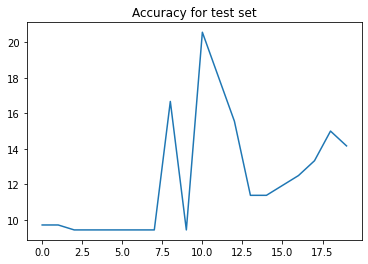

In [7]:
import matplotlib.pyplot as plt
plt.plot(epoch,acc)
plt.title("Accuracy for test set")

Text(0.5, 1.0, 'MSE for test set')

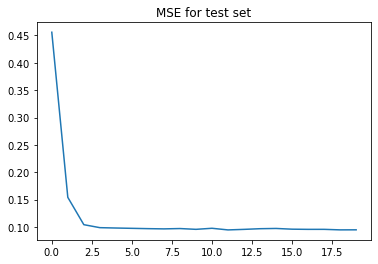

In [8]:
plt.plot(epoch,MSE)
plt.title("MSE for test set")


In [9]:
NN_b_2=NeuralNetwork(0.1,20)
acc=[]
MSE=[]
for i in range(20): 
    MSE.append(np.mean(np.square(y_train - NN_b_2.feedForward(X_train))))
    y_hat=NN_b_2.feedForward(X_train)
    acc.append(accuracy(y_hat, y_train))
    NN_b_2.train(X_train,y_train)

Text(0.5, 1.0, 'Accuracy for train set')

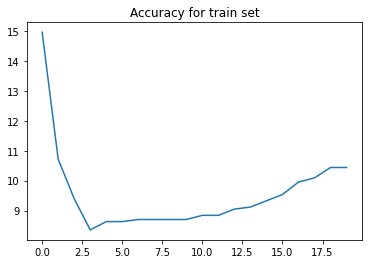

In [10]:
import matplotlib.pyplot as plt
plt.plot(epoch,acc)
plt.title("Accuracy for train set")

Text(0.5, 1.0, 'MSE for train set')

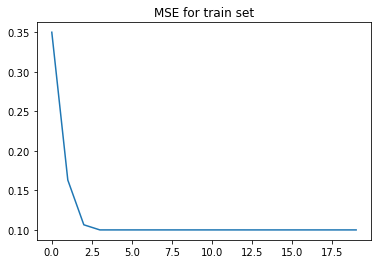

In [11]:
plt.plot(epoch,MSE)
plt.title("MSE for train set")


<b>C) Which of the two metrics is the most interesting when performing classification? Explain 

Since we are doing the classification, the accuracy metrics is better. Because it shows what percentage of y is classified correctly.  

<b>D)Change the number of training epochs. After which epoch do you consider the network as ”fully trained” and why?

Text(0.5, 1.0, 'acc for train set')

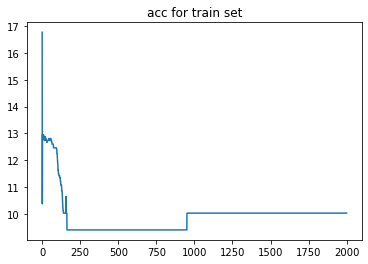

In [12]:
NN_c_1=NeuralNetwork(0.1,20)
acc=[]
MSE=[]
for i in range(2000): 
    MSE.append(np.mean(np.square(y_train - NN_c_1.feedForward(X_train))))
    y_hat=NN_c_1.feedForward(X_train)
    acc.append(accuracy(y_train, y_hat))
    NN_c_1.train(X_train,y_train)
epoch=range(2000)
plt.plot(epoch,acc)
plt.title("acc for train set")

The convergence happens around 200 epoch. but the accuracy is very low and only can predict 10 percent correctly. I do not consider it fully train because the accuracy is very low.

<b> E) Set the learning rate to 0.001. Is the performance higher or lower compared to a learning rate of 0.1? Explain why.

Text(0.5, 1.0, 'acc for train set')

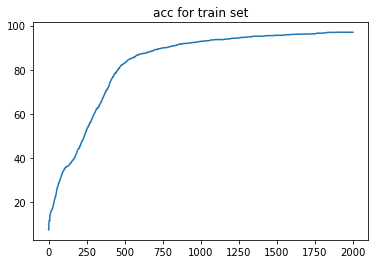

In [13]:
NN_e_1=NeuralNetwork(0.001,20)
acc=[]
MSE=[]
for i in range(2000): 
    MSE.append(np.mean(np.square(y_train - NN_e_1.feedForward(X_train))))
    y_hat=NN_e_1.feedForward(X_train)
    acc.append(accuracy(y_train, y_hat))
    NN_e_1.train(X_train,y_train)
epoch=range(2000)
plt.plot(epoch,acc)
plt.title("acc for train set")

0.001 is much better that 0.1 because it does not increase the weights a lot so we can find the convergence. Also the accuracy score is close to one which suggests that our model performs better.  in the next plot I am going to increase the epoch to 4000 to see if it shows any convergence

Text(0.5, 1.0, 'acc for train set')

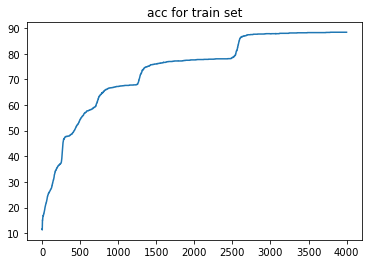

In [14]:
NN_e_2=NeuralNetwork(0.001,20)
acc=[]
MSE=[]
for i in range(4000): 
    MSE.append(np.mean(np.square(y_train - NN_e_2.feedForward(X_train))))
    y_hat=NN_e_2.feedForward(X_train)
    acc.append(accuracy(y_train, y_hat))
    NN_e_2.train(X_train,y_train)
epoch=range(4000)
plt.plot(epoch,acc)
plt.title("acc for train set")

We can see convergence in the above graph. so I think the learning rate should be around 0.001

<b> F) Set the learning rate to 10. Explain the effect

<ipython-input-1-6cf07e9990b3>:9: RuntimeWarning: overflow encountered in exp
  y = 1./(1+np.exp(-x));


Text(0.5, 1.0, 'acc for train set')

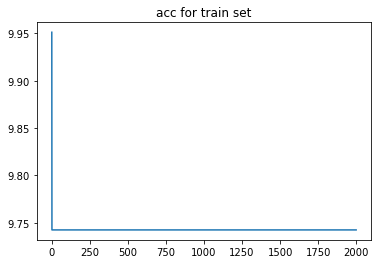

In [15]:
NN_f_1=NeuralNetwork(1,20)
acc=[]
MSE=[]
for i in range(2000): 
    MSE.append(np.mean(np.square(y_train - NN_f_1.feedForward(X_train))))
    y_hat=NN_f_1.feedForward(X_train)
    acc.append(accuracy(y_train, y_hat))
    NN_f_1.train(X_train,y_train)
epoch=range(2000)
plt.plot(epoch,acc)
plt.title("acc for train set")

It has very bad effect on finding the convergence point.  learning rate=1 causes the model to converge too quickly to a suboptimal point while missing the optimal value. 

<b>G) Go back to the working training configuration in (a). Set the number of neurons of the hidden layer to 2. Explain the effect

Text(0.5, 1.0, 'acc for train set')

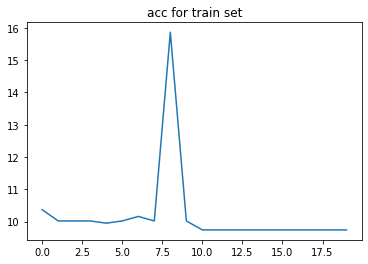

In [16]:
NN_g=NeuralNetwork(0.1,2)
acc=[]
MSE=[]
for i in range(20): 
    MSE.append(np.mean(np.square(y_train - NN_g.feedForward(X_train))))
    y_hat=NN_g.feedForward(X_train)
    acc.append(accuracy(y_train, y_hat))
    NN_g.train(X_train,y_train)
epoch=range(20)
plt.plot(epoch,acc)
plt.title("acc for train set")

It seems that the number accuracy does not change after 2 iterations which is interesting. With 2 neurons in the hidden layer and 20 iterations the model can only explain 10 percent correctly

<b>h) Go back to the working training configuration in (a). Set the number of neurons of the hidden layer to 200. Explain the effect

Text(0.5, 1.0, 'acc for train set')

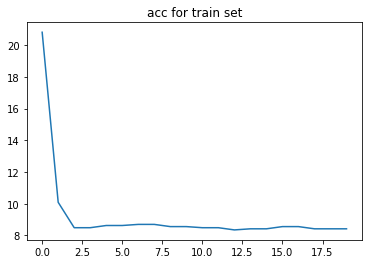

In [17]:
NN_h=NeuralNetwork(0.1,200)
acc=[]
MSE=[]
for i in range(20): 
    MSE.append(np.mean(np.square(y_train - NN_h.feedForward(X_train))))
    y_hat=NN_h.feedForward(X_train)
    acc.append(accuracy(y_train, y_hat))
    NN_h.train(X_train,y_train)
epoch=range(20)
plt.plot(epoch,acc)
plt.title("acc for train set")

As we can see in the above graph, increasing the number of neorons make the graph to converge to 17 percent. this is a quite small number for the accuracy though. This means out model after 20 iterations and with 200 hiden layer can only predict 17 percent correctly. 

# optimal

Text(0.5, 1.0, 'acc for train set')

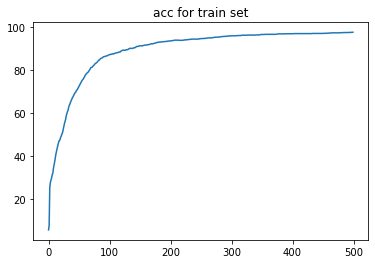

In [38]:
NN_z_1=NeuralNetwork(0.005,20)
acc=[]
MSE=[]
for i in range(500): 
    MSE.append(np.mean(np.square(y_train - NN_z_1.feedForward(X_train))))
    y_hat=NN_z_1.feedForward(X_train)
    acc.append(accuracy(y_train, y_hat))
    NN_z_1.train(X_train,y_train)
epoch=range(500)
plt.plot(epoch,acc)
plt.title("acc for train set")

I plotted the optimal alpha and epoch just because I was curious 